In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df["ApplicantIncome"].min()

150

In [4]:
df["ApplicantIncome"].max()

81000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

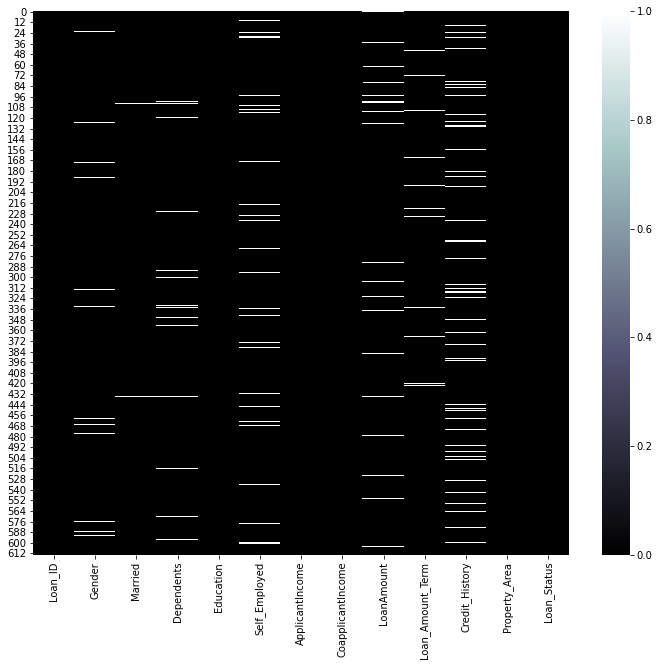

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull() ,cmap="bone")

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Finding NULL value columns 

In [8]:


for i in df:
    if df[i].isnull().sum()!= 0:
        print(i,"is of",df[i].dtypes ," of type and has ",df[i].isnull().sum(),"null values","\n")

Gender is of object  of type and has  13 null values 

Married is of object  of type and has  3 null values 

Dependents is of object  of type and has  15 null values 

Self_Employed is of object  of type and has  32 null values 

LoanAmount is of float64  of type and has  22 null values 

Loan_Amount_Term is of float64  of type and has  14 null values 

Credit_History is of float64  of type and has  50 null values 



In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data imputation 

In [11]:
# replace
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")

Modcol=["Gender","Married","Dependents","Self_Employed"]
for i in Modcol:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    
imp1= SimpleImputer(strategy="mean")
meancol=["LoanAmount","Loan_Amount_Term","Credit_History"] 
for i in meancol:
    df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))   
   

In [12]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
191,LP001656,Male,No,0,Graduate,No,12000,0.0,164.0,360.0,1.0,Semiurban,N
355,LP002144,Female,No,0,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
32,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
365,LP002181,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N


<AxesSubplot:>

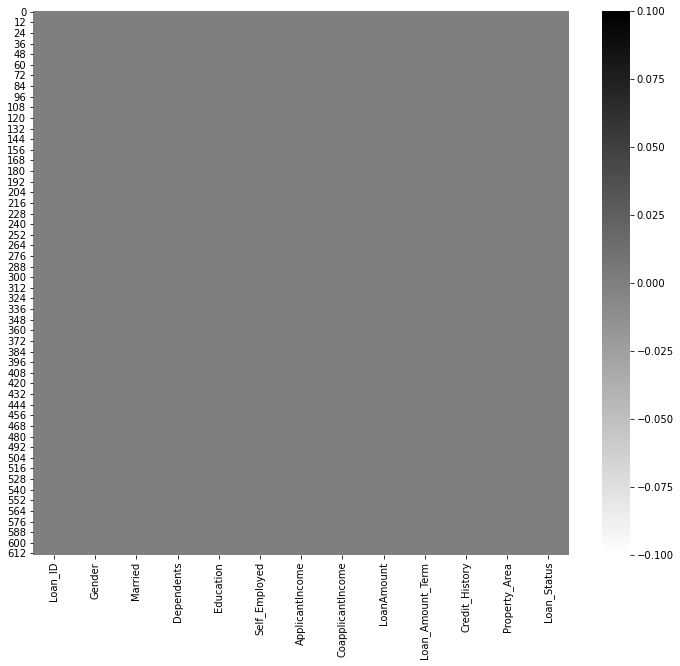

In [13]:
#checking the null values again 
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull() ,cmap="binary")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
#checking for unique values 
for i in df:
    print(i , df[i].unique())

Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

# Changing float into int type for better  analysis 

In [16]:
floatcol=[]
for i in df:
    if df[i].dtype=="float64":
        floatcol.append(i)
        print(i)
        
floatcol
        

CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [17]:
for i in floatcol:
    df[i] = df[i].astype(int)
    

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int32 
 8   LoanAmount         614 non-null    int32 
 9   Loan_Amount_Term   614 non-null    int32 
 10  Credit_History     614 non-null    int32 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int32(4), int64(1), object(8)
memory usage: 52.9+ KB


In [19]:
df.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
466,LP002500,Male,Yes,3+,Not Graduate,No,2947,1664,70,180,0,Urban,N
480,LP002534,Female,No,0,Not Graduate,No,4350,0,154,360,1,Rural,Y


# Checking Int columns for Later scaling 

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.397394,342.000000,0.773616
std,6109.041673,2926.24876,84.037503,64.372489,0.418832
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [21]:
#int columns  are in int32 and 64  type so we have to consider both 

intcol=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

for i in intcol:
    print(i ,"\n" , df[i].min(),"is min and", df[i].max() , "is max value  \n")


ApplicantIncome 
 150 is min and 81000 is max value  

CoapplicantIncome 
 0 is min and 41667 is max value  

LoanAmount 
 9 is min and 700 is max value  

Loan_Amount_Term 
 12 is min and 480 is max value  

Credit_History 
 0 is min and 1 is max value  



Observation -We  can see  the min and max value are having too huge difference   if we  compare  the different columns . 
in loan tem 480 is max but applicnt income max is 81K so this is a huge gap that can cause disturbance in  analysis . so  we will scale the columns except credit_history as its a binary column that has  yes or no  kind of value . 

In [22]:
scaling_list=list(intcol[:-1])

In [23]:
scaling_list

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [24]:
intcol

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [25]:
print(i , df[i].min(),df[i].max())

Credit_History 0 1


# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

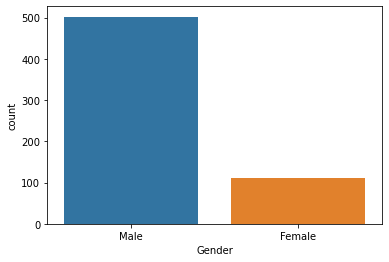

In [26]:
sns.countplot(df['Gender'])

Shows male  applicant numbers are high as compared to females

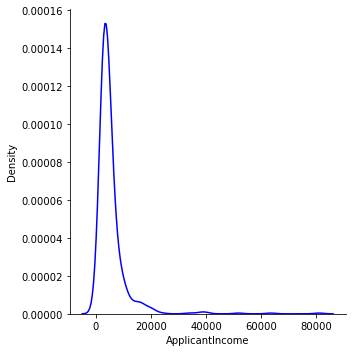

In [27]:
sns.displot(df['ApplicantIncome'],kind='kde',color='blue')

people with an income range  from 0 to 20K apply for the loan mostly as they are considered to be the needy 

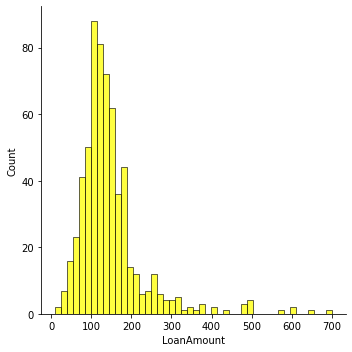

In [28]:
sns.displot(df['LoanAmount'],color='yellow')

In [29]:
df["LoanAmount"]

0      146
1      128
2       66
3      120
4      141
      ... 
609     71
610     40
611    253
612    187
613    133
Name: LoanAmount, Length: 614, dtype: int32

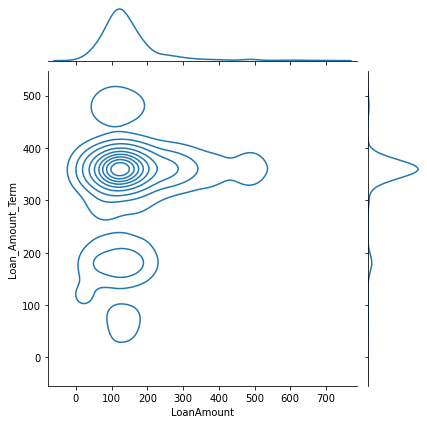

In [30]:
#plt.bar(df["LoanAmount"],df["Loan_Amount_Term"])
sns.jointplot(data=df,x="LoanAmount",y="Loan_Amount_Term",kind="kde")

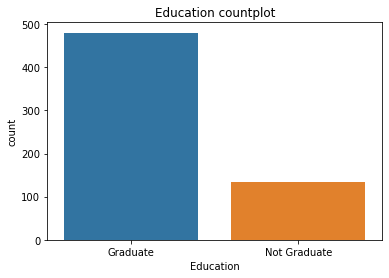

In [31]:
plt.title ("Education countplot")
sns.countplot(df['Education'])
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

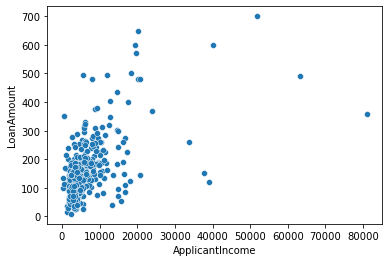

In [32]:
sns.scatterplot(data=df,x="ApplicantIncome",y="LoanAmount")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

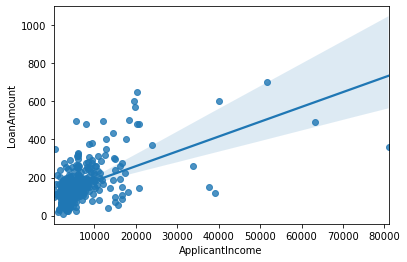

In [33]:
sns.regplot(data=df,x="ApplicantIncome",y="LoanAmount")

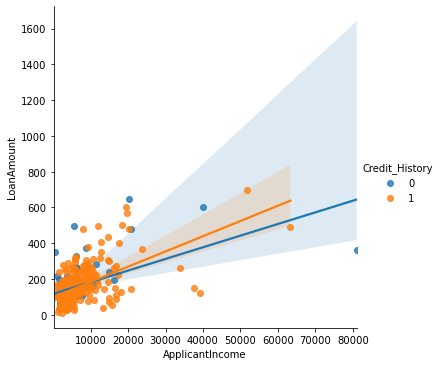

In [34]:
sns.lmplot(data=df,x="ApplicantIncome",y="LoanAmount",hue="Credit_History")

Observation - People with credit history  are the ones who are more likely to get loan approved  often

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int32 
 8   LoanAmount         614 non-null    int32 
 9   Loan_Amount_Term   614 non-null    int32 
 10  Credit_History     614 non-null    int32 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int32(4), int64(1), object(8)
memory usage: 52.9+ KB


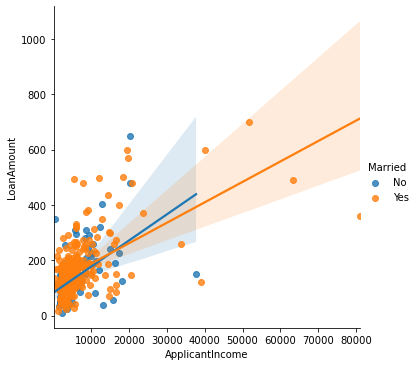

In [36]:
sns.lmplot(data=df,x="ApplicantIncome",y="LoanAmount",hue="Married")

Observation - married People  are the ones who get loan approved  often

<Figure size 2160x1080 with 0 Axes>

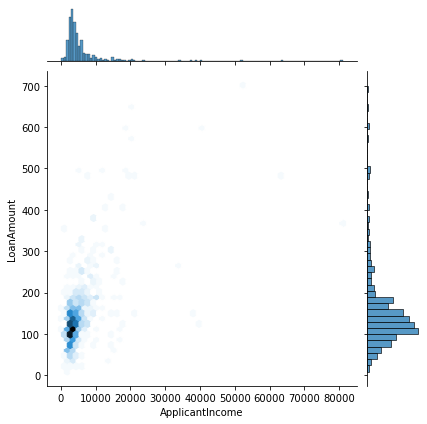

In [37]:
plt.figure(figsize=(30,15))
sns.jointplot(data=df,x="ApplicantIncome",y="LoanAmount",kind="hex")

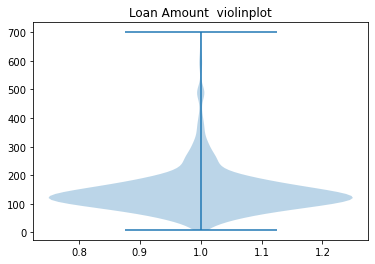

In [38]:
plt.title ("Loan Amount  violinplot")
plt.violinplot(df["LoanAmount"] )
plt.show()

In [39]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y


# Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

encod=["Loan_ID","Gender","Married","Education","Dependents","Self_Employed",
       "Property_Area","Loan_Status"]
for val in encod:
    df[val]=le.fit_transform(df[val].astype(str))
    #as type describes that the data present are in str format
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0,71,360,1,0,1
610,610,1,1,3,0,0,4106,0,40,180,1,0,1
611,611,1,1,1,0,0,8072,240,253,360,1,2,1
612,612,1,1,2,0,0,7583,0,187,360,1,2,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int32
 1   Gender             614 non-null    int32
 2   Married            614 non-null    int32
 3   Dependents         614 non-null    int32
 4   Education          614 non-null    int32
 5   Self_Employed      614 non-null    int32
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int32
 8   LoanAmount         614 non-null    int32
 9   Loan_Amount_Term   614 non-null    int32
 10  Credit_History     614 non-null    int32
 11  Property_Area      614 non-null    int32
 12  Loan_Status        614 non-null    int32
dtypes: int32(12), int64(1)
memory usage: 33.7 KB


<AxesSubplot:>

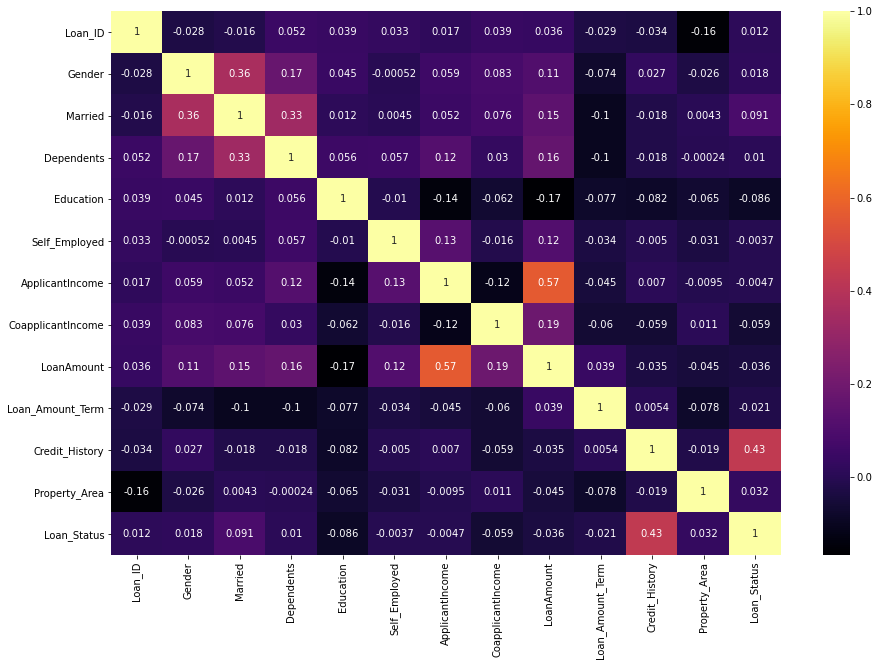

In [42]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap="inferno")

In [43]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Loan_ID                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Gender               AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Married               AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Dependents           AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Self_Employed           AxesSubplot(0.125,0.391471;0.133621x0.222059)
ApplicantIncome      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
CoapplicantIncome     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
LoanAmount           AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Loan_Amount_Term     AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Credit_History             AxesSubplot(0.125,0.125;0.133621x0.222059)
Property_Area           AxesSubplot(0.285345,0.125;0.133621x0.222059)
Loan_Status              AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

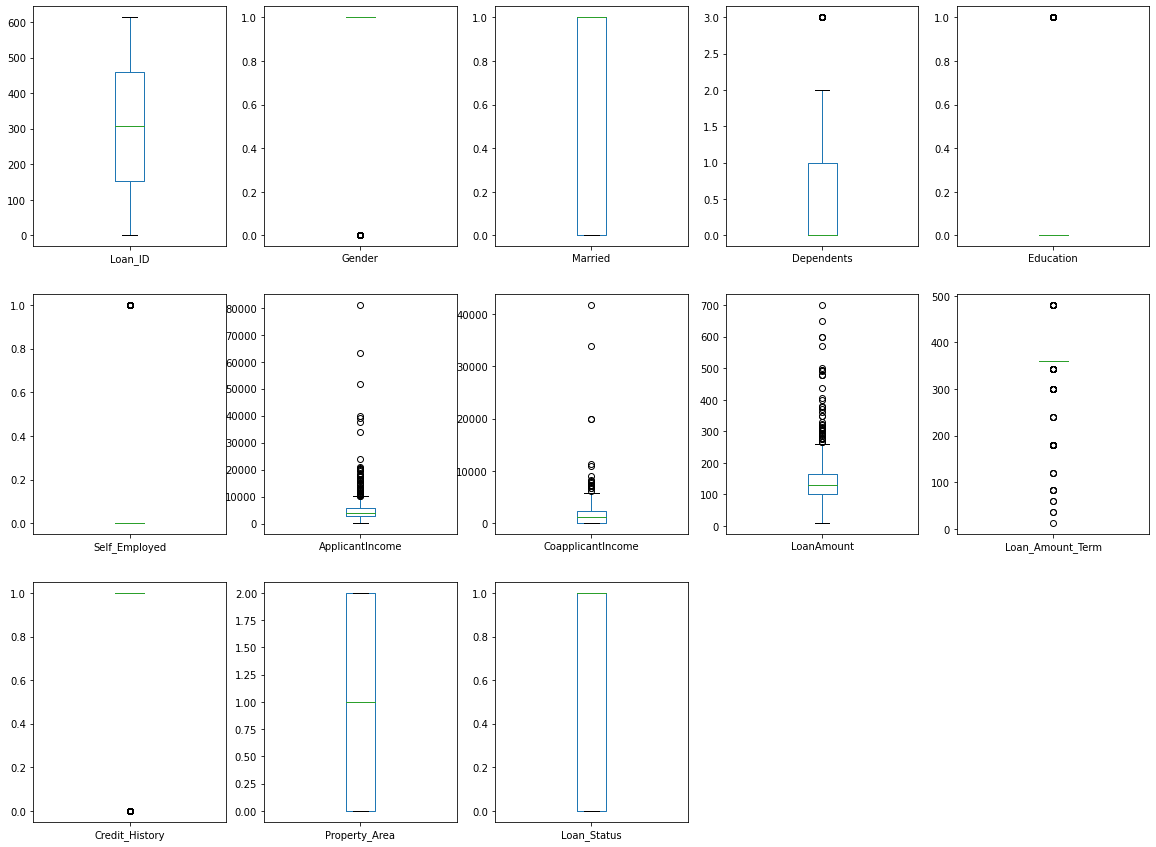

In [44]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(3,5) , figsize=(20,15))

In [45]:
df["Dependents"].unique()

array([0, 1, 2, 3])

<AxesSubplot:xlabel='ApplicantIncome'>

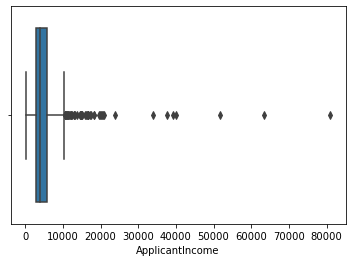

In [46]:
sns.boxplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

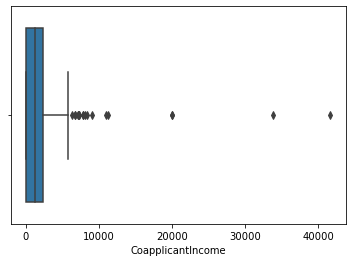

In [47]:
sns.boxplot(df["CoapplicantIncome"])

In [48]:
df.shape

(614, 13)

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [50]:
df.shape

(577, 13)

In [51]:
577/614

0.9397394136807817

<AxesSubplot:>

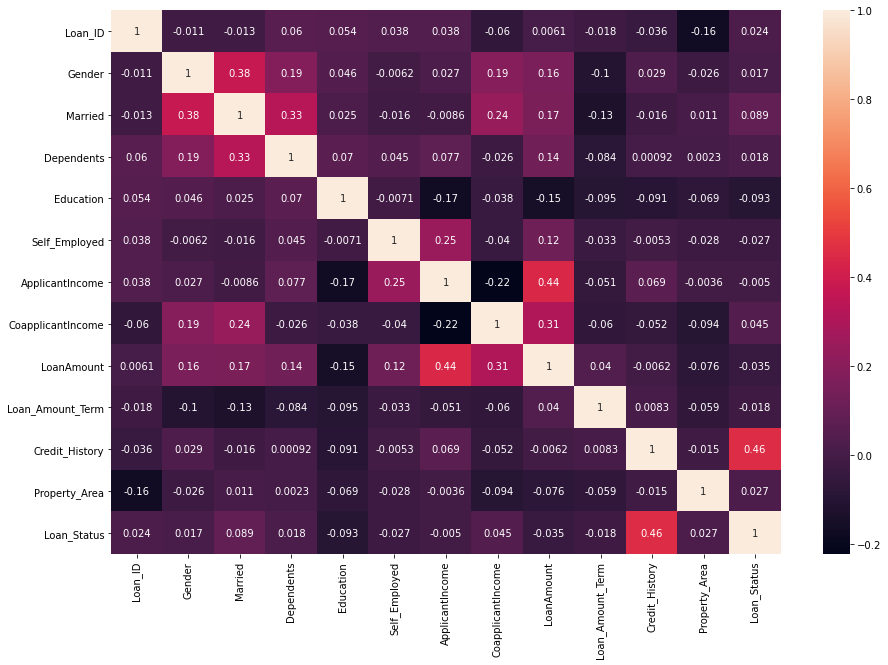

In [52]:
#checking the corelation again 
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [53]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.114116
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

2.148522232025973


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

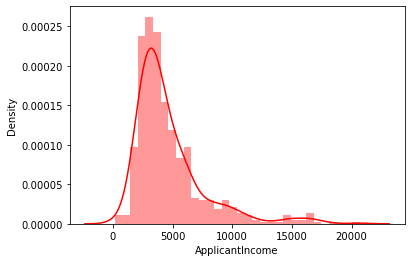

In [54]:
print(df["ApplicantIncome"].skew())
sns.distplot(df["ApplicantIncome"] ,color="r")

1.2086126392712866


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

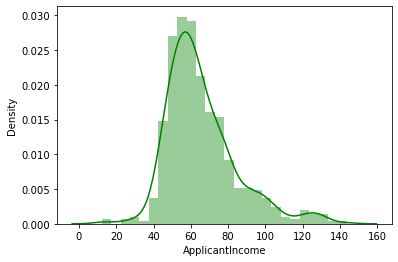

In [55]:
df["ApplicantIncome"]=np.sqrt(df["ApplicantIncome"])
print(df["ApplicantIncome"].skew())
sns.distplot(df["ApplicantIncome"] ,color="g")

1.3505180990722137


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

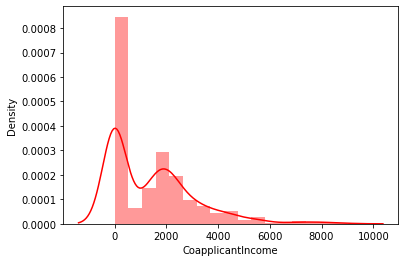

In [56]:
print(df["CoapplicantIncome"].skew())
sns.distplot(df["CoapplicantIncome"] ,color="r")

0.20759374629855248


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

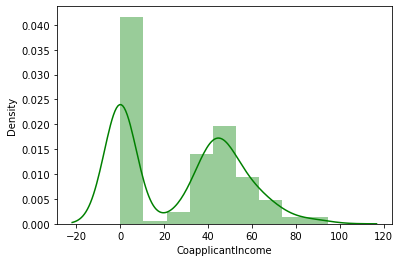

In [57]:
df["CoapplicantIncome"]=np.sqrt(df["CoapplicantIncome"])
print(df["CoapplicantIncome"].skew())
sns.distplot(df["CoapplicantIncome"] ,color="g")

1.114115513843448


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

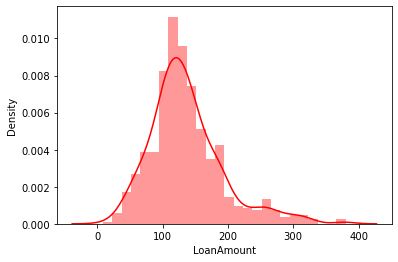

In [58]:
print(df["LoanAmount"].skew())
sns.distplot(df["LoanAmount"] ,color="r")

0.32121312423784254


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

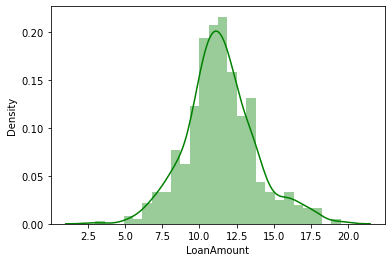

In [59]:
df["LoanAmount"]=np.sqrt(df["LoanAmount"])
print(df["LoanAmount"].skew())
sns.distplot(df["LoanAmount"] ,color="g")

-2.077031480435139


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

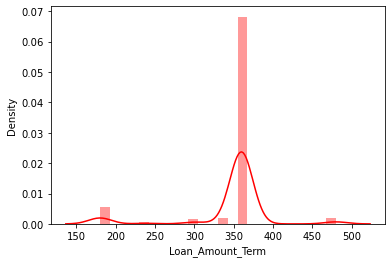

In [60]:
print(df["Loan_Amount_Term"].skew())
sns.distplot(df["Loan_Amount_Term"] ,color="r")

In [61]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207594
LoanAmount           0.321213
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [62]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
57,57,1,1,0,0,0,58.017239,46.904158,11.618950,360,1,0,0
411,411,1,1,0,0,0,79.094880,0.000000,12.649111,360,0,2,1
118,118,1,1,0,0,0,74.619032,46.281746,13.228757,360,1,0,0


In [63]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207594
LoanAmount           0.321213
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [64]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207594
LoanAmount           0.321213
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

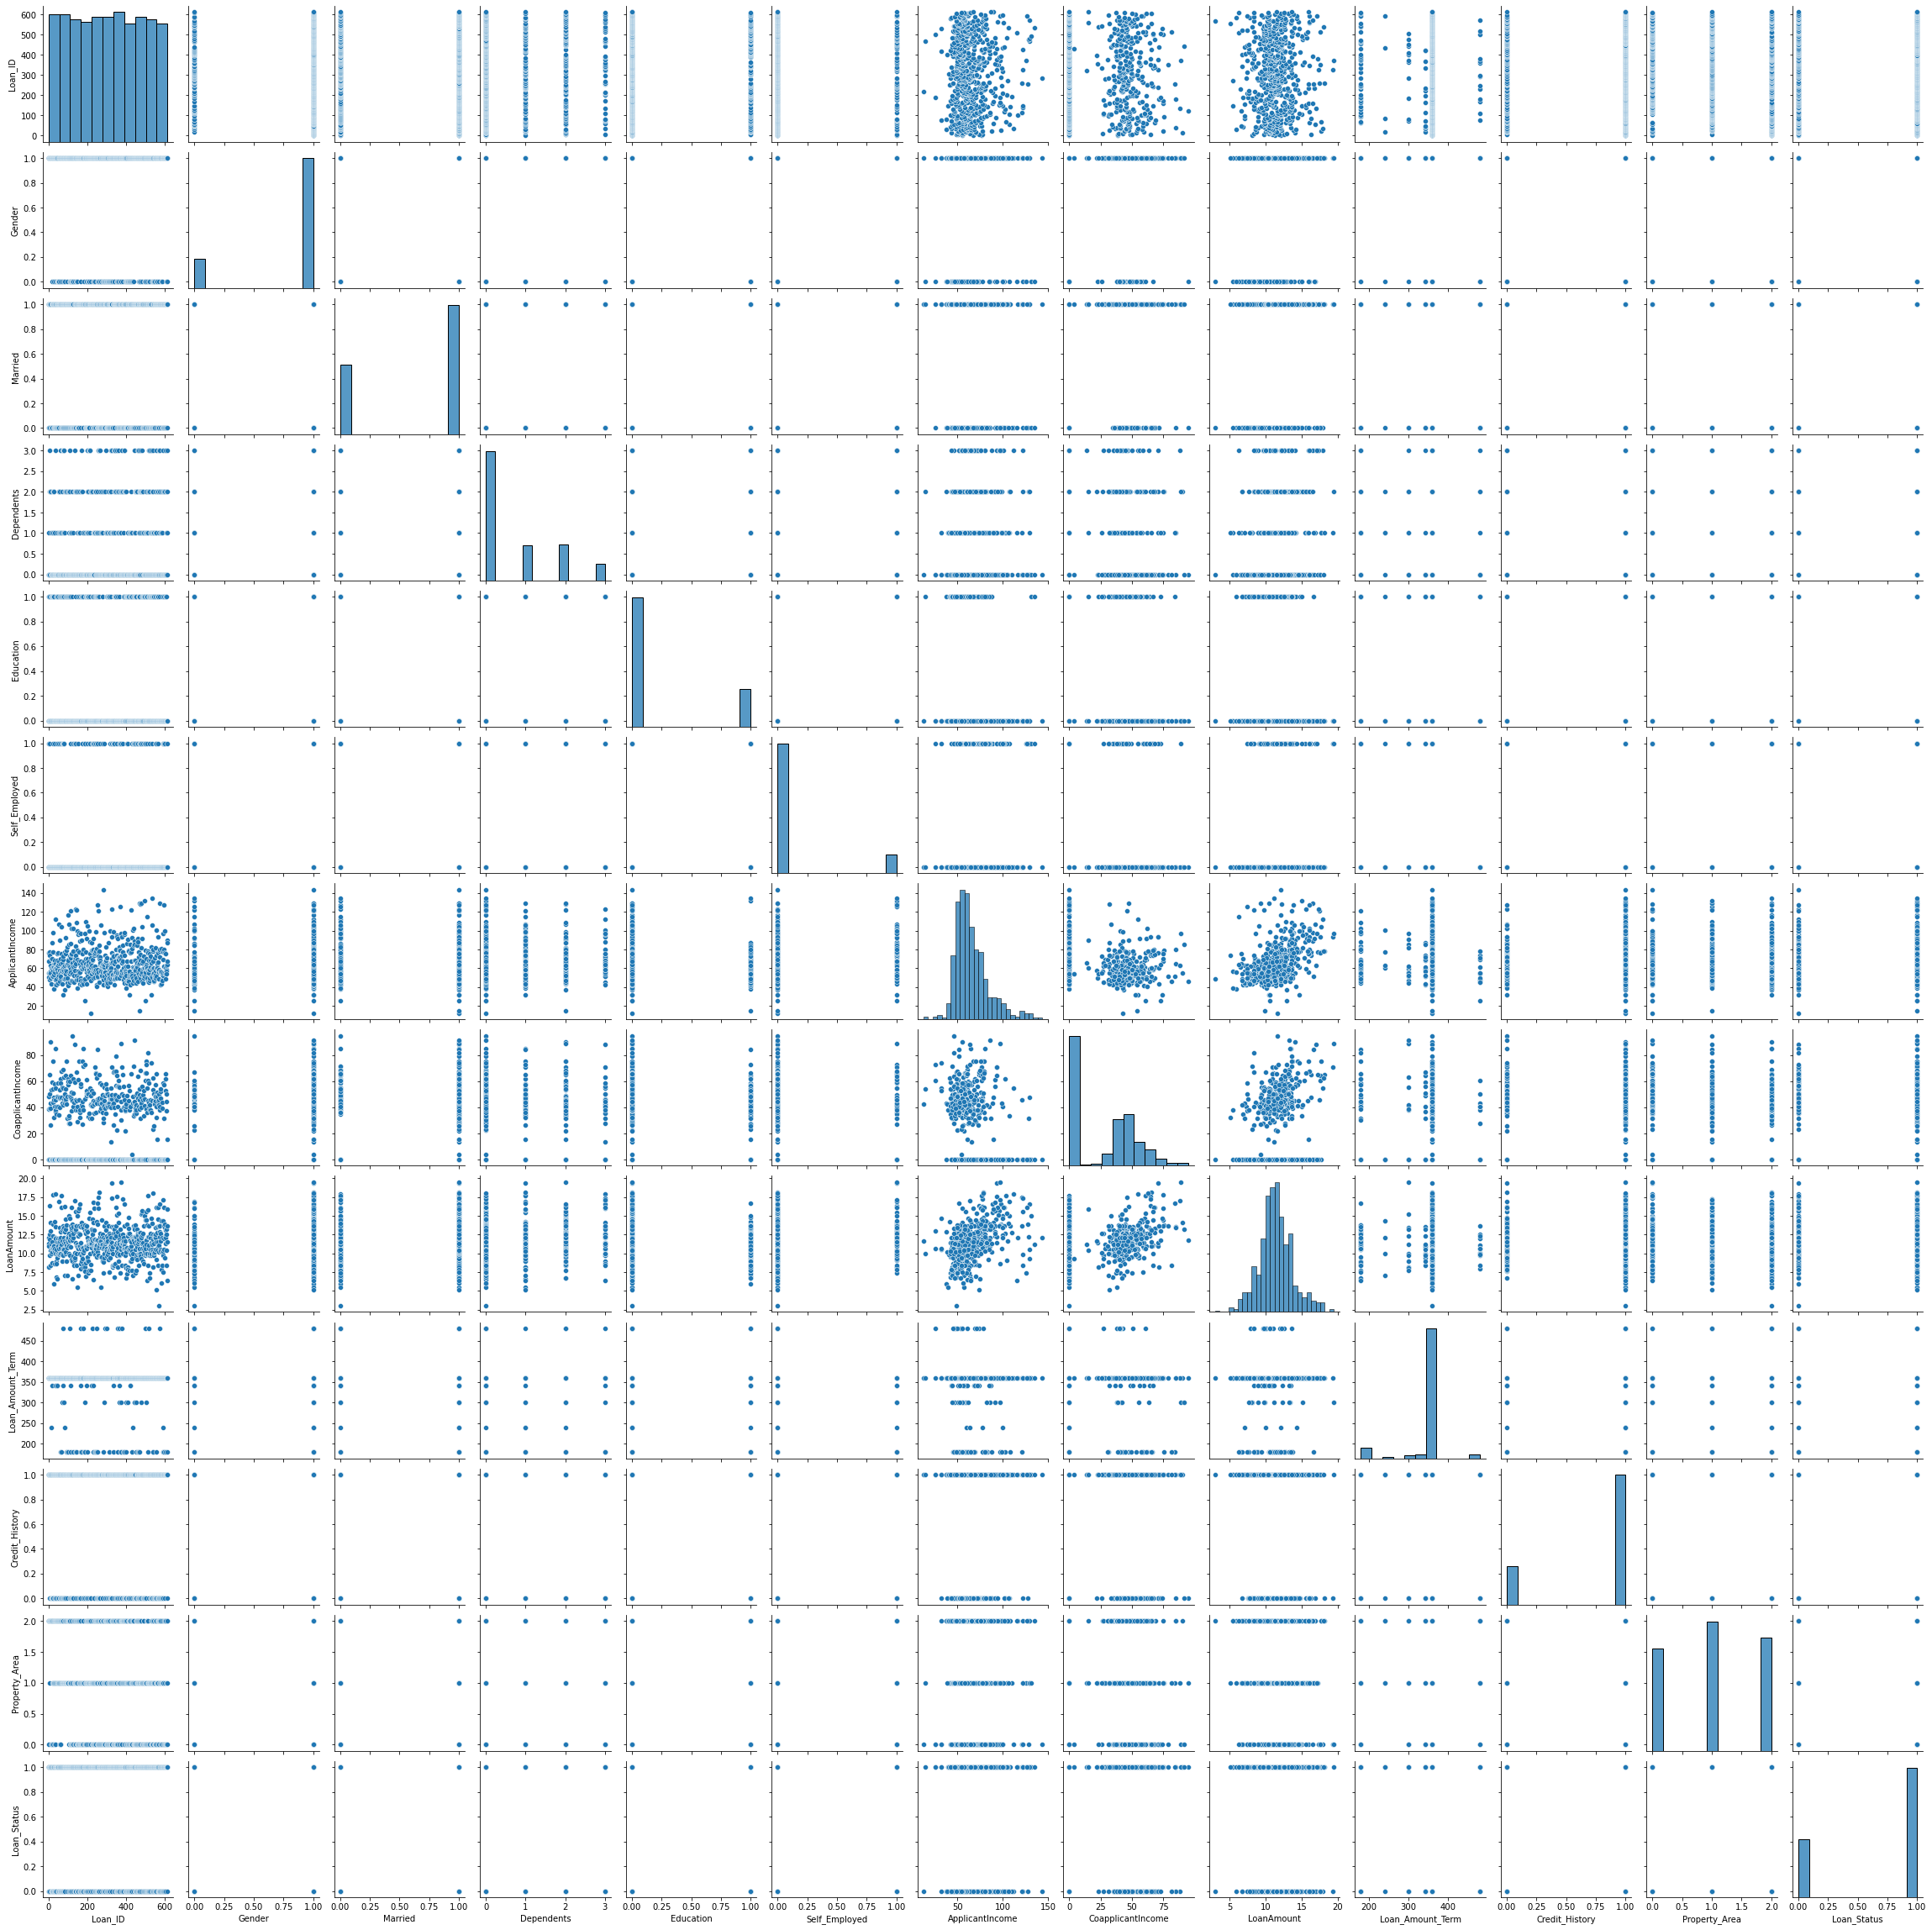

In [65]:
sns.pairplot(df)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

calc_vif(df)

,variables,VIF FACTOR
0,Loan_ID,3.938425
1,Gender,6.432828
2,Married,3.973539
3,Dependents,1.791175
4,Education,1.319668
5,Self_Employed,1.218587
6,ApplicantIncome,22.109782
7,CoapplicantIncome,3.319125
8,LoanAmount,39.084616
9,Loan_Amount_Term,21.834255


<AxesSubplot:>

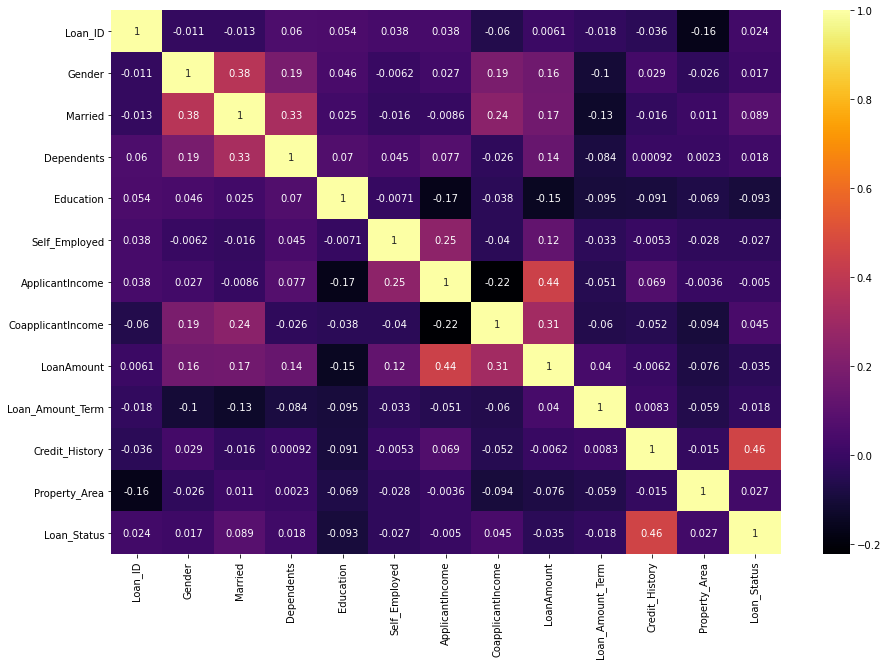

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(cor , annot=True,cmap="inferno")

# Scaling 

In [68]:
scaling_list

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [70]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df[scaling_list])

df[scaling_list] = scaler.transform(df[scaling_list])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.573815,-1.048377,0.280483,0.239408,1,2,1
1,1,1,1,1,0,0,0.108539,0.444243,-0.047276,0.239408,1,0,0
2,2,1,1,0,0,1,-0.576353,-1.048377,-1.406161,0.239408,1,2,1
3,3,1,1,0,1,0,-0.785602,0.818091,-0.200329,0.239408,1,2,1
4,4,1,0,0,0,0,0.625791,-1.048377,0.191569,0.239408,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.625134,-1.048377,-1.277453,0.239408,1,0,1
610,610,1,1,3,0,0,-0.083263,-1.048377,-2.172789,-3.237229,1,0,1
611,611,1,1,1,0,0,1.282019,-0.452915,1.909152,0.239408,1,2,1
612,612,1,1,2,0,0,1.135569,-1.048377,0.958610,0.239408,1,2,1


### Working towards prediction model building  . 

In [71]:
# splitting target 
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

from sklearn.model_selection import train_test_split 

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running before using PCA 

best accuracy  is  0.7528735632183908 with random state  38


In [73]:
df.shape

(577, 13)

In [74]:
x.shape

(577, 12)

In [75]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=6)

In [76]:
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running after using PCA 

best accuracy  is  0.7586206896551724 with random state  95


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=24)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [79]:
from sklearn.tree import DecisionTreeRegressor

DTC=DecisionTreeRegressor()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        50
           1       0.85      0.80      0.82       124

    accuracy                           0.75       174
   macro avg       0.70      0.72      0.71       174
weighted avg       0.76      0.75      0.76       174



In [80]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.72      0.52      0.60        50
           1       0.83      0.92      0.87       124

    accuracy                           0.80       174
   macro avg       0.77      0.72      0.74       174
weighted avg       0.80      0.80      0.79       174



In [81]:
from sklearn.svm import SVC

SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.71      1.00      0.83       124

    accuracy                           0.71       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.51      0.71      0.59       174



In [82]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.74      0.50      0.60        50
           1       0.82      0.93      0.87       124

    accuracy                           0.80       174
   macro avg       0.78      0.71      0.73       174
weighted avg       0.80      0.80      0.79       174



In [83]:
# Cross validation
from sklearn.model_selection import cross_val_score

models=(DTC,RF,SVCc,lg)
for i in models:
    print (i , cross_val_score(i,x,y,cv=15).mean()*100)

DecisionTreeRegressor() -39.828534388317
RandomForestClassifier() 75.91992802519117
SVC() 68.97435897435896
LogisticRegression() 77.8182636077373


## using hyper parameter

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
parameters={"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
            "intercept_scaling":np.arange(1.0,10.0),
            "C":np.arange(1.0,10.0),
           "fit_intercept":["True","False"]}

In [86]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=15)

#note - keeping the cv value  higher for  better result 

In [87]:
RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                         'fit_intercept': ['True', 'False'],
                         'intercept_scaling': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [89]:
#getting the best params 
GCV.best_params_

{'C': 1.0,
 'fit_intercept': 'True',
 'intercept_scaling': 1.0,
 'solver': 'liblinear'}

In [90]:
#saving best model with  GCV 
LoanPredict_model=LogisticRegression(C=1.0,fit_intercept="True",solver="liblinear",intercept_scaling=1.0)
LoanPredict_model.fit(x_train,y_train)
pred=LoanPredict_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

79.88505747126436


In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [92]:
pred_y_proba=LoanPredict_model.predict_proba(x_test)[:,1]
pred_y_proba

array([0.83496706, 0.76207491, 0.84843087, 0.86459151, 0.64551754,
       0.82389447, 0.15642683, 0.95993675, 0.39862675, 0.70607595,
       0.73088038, 0.73146216, 0.33793942, 0.78708085, 0.83068008,
       0.83147094, 0.75220146, 0.85364123, 0.84128184, 0.72209231,
       0.84120711, 0.86031617, 0.60567214, 0.70291934, 0.23750502,
       0.83126353, 0.68751667, 0.67852005, 0.23152212, 0.63564238,
       0.71522885, 0.40888322, 0.95455555, 0.86121887, 0.60836045,
       0.75917725, 0.83267368, 0.86989574, 0.65347858, 0.74387706,
       0.58827451, 0.8386829 , 0.31927397, 0.85938629, 0.83771347,
       0.88722313, 0.81335602, 0.80078969, 0.6660784 , 0.77156273,
       0.45128746, 0.85216391, 0.80640426, 0.68550019, 0.53403363,
       0.81181191, 0.91107403, 0.69391748, 0.83466603, 0.73373201,
       0.6896515 , 0.24873135, 0.35031689, 0.45088958, 0.79443189,
       0.82110083, 0.70940505, 0.82613559, 0.35982377, 0.70565383,
       0.84420723, 0.83600065, 0.41786856, 0.23833819, 0.76175

In [93]:
# constant synax #
fpr,tpr,thresholds=roc_curve(y_test, pred_y_proba)

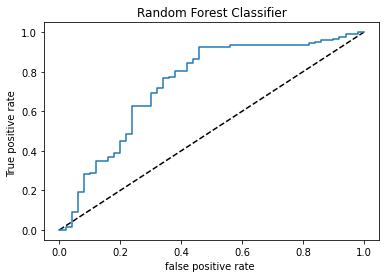

In [94]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label="final_model")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title( "Random Forest Classifier" )
plt.show()

### saving  final model 

In [95]:
import joblib
joblib.dump(LoanPredict_model,"LoanPredict_model.pkl")

['LoanPredict_model.pkl']